## Phase 3.25
# Introduction to Logistic Regression
## Objectives

***Modeling: Logistic Regression***
- Walk through transforming a problem from <a href='#linear_to_logistic'>Linear => Logistic Regression</a>.
- High-level explanation of <a href='#logistic_regression'>Logistic Regression</a> and the difference between *Linear/Logistic*.

***Model Evaluation***
- Introduce ways to evaluate a Classifier's performance.
    - <a href='#cm'>Confusion Matrix</a>
    - <a href='#metrics'>Metrics</a>
        - Accuracy, Recall, Precision, F1-Score, ROC / AUC
    
***Class Imbalance***
- Discuss the problems associated with <a href='#class_imb'>Class Imbalance</a> and ways to address it.

<a id='linear_to_logistic'></a>
# Interactive: Transforming LinearRegression to LogisticRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plotting style.
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

BLUE = '#1f77b4'

*Starting with a Linear Regression example.*

In [3]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

### Linear Problem => Linear Model

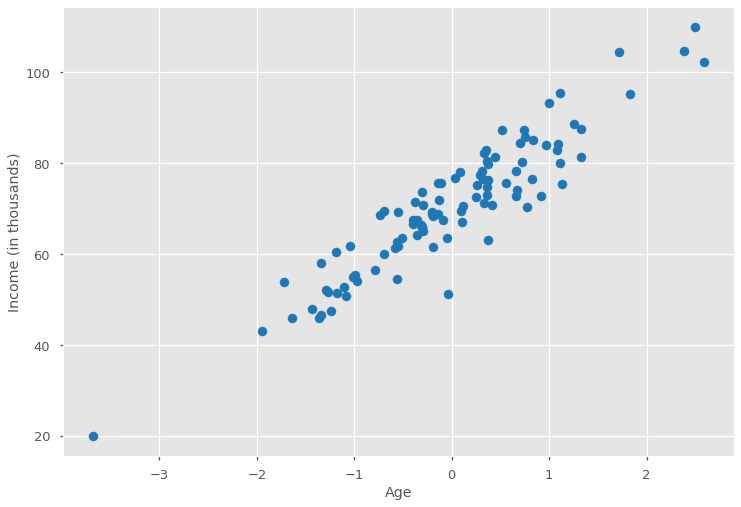

In [4]:
# Generate a dataset! Let's say X, y = ('age', 'income').
X, y = make_regression(
    n_samples=100,
    n_features=1,
    noise=10,
    random_state=51
    )

# Scale y (income in thousands) to a range that makes sense.
scaler = MinMaxScaler(feature_range=(20, 110))
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1,)

# Let's see it!
fig, ax = plt.subplots()
ax.scatter(x=X, y=y, color=BLUE)
ax.set(xlabel='Age', ylabel='Income (in thousands)')
fig.tight_layout()

In [5]:
from sklearn.linear_model import LinearRegression

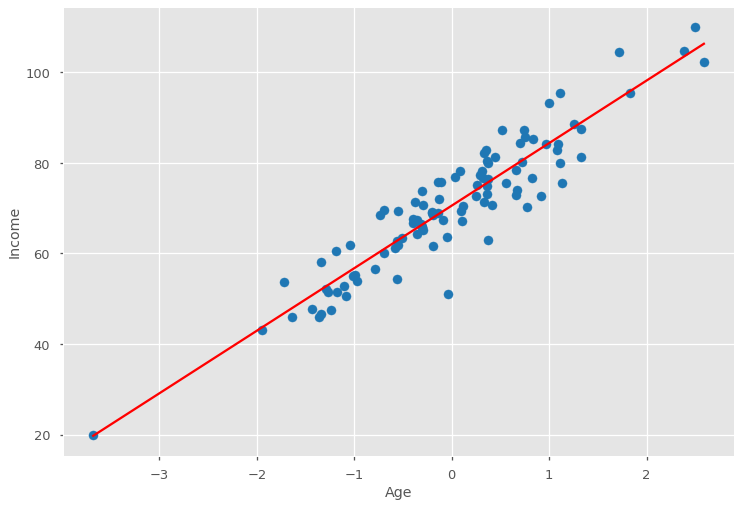

In [6]:
# Fitting a Linear model.
linreg = LinearRegression()
linreg.fit(X, y)

# Get and show predictions.
linreg_preds = [linreg.predict([[x_val]]) 
                for x_val in [X.min(), X.max()]]

# Show.
fig, ax = plt.subplots()
ax.scatter(x=X, y=y, color=BLUE)
ax.plot([X.min(), X.max()], 
        linreg_preds, 
        color='red')
ax.set(xlabel='Age', ylabel='Income')
fig.tight_layout()

*Looks reasonable!*

*But what if what we're trying to predict isn't continuous?*

### Categorical Problem => Linear Model

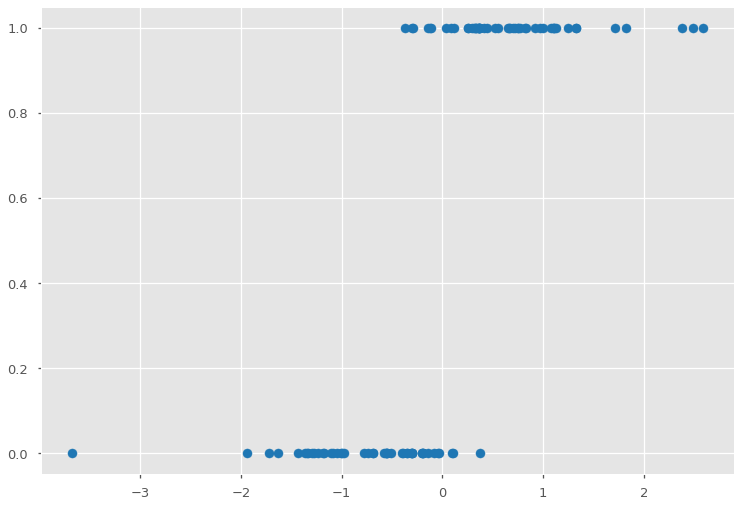

In [7]:
# Create a binary version of y.
y_binary = y.copy()

y_binary = (y > 70).astype(int)

fig, ax = plt.subplots()
ax.scatter(X, y_binary, color=BLUE)
fig.tight_layout()

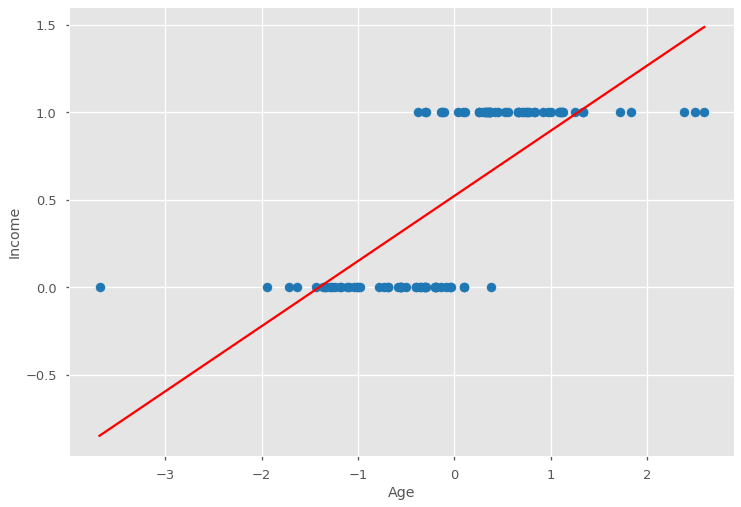

In [8]:
# Let's try to fit a Linear model.
linreg_binary = LinearRegression()
linreg_binary.fit(X, y_binary)

# Get and show predictions.
linreg_preds_binary = [linreg_binary.predict([[x_val]]) 
                       for x_val in [X.min(), X.max()]]

# Show.
fig, ax = plt.subplots()
ax.scatter(x=X, y=y_binary, color=BLUE)
ax.plot([X.min(), X.max()], 
        linreg_preds_binary, 
        color='red')
ax.set(xlabel='Age', ylabel='Income')
fig.tight_layout()

*Not the best model type for this problem...*

### Categorical Problem => Categorical Model
***Enter: Logistic Regression!***

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# Let's create a new model together!
logreg = LogisticRegression()
logreg.fit(X, y_binary)

LogisticRegression()

In [11]:
logreg.predict_proba(X)

array([[2.03073513e-01, 7.96926487e-01],
       [6.67606575e-02, 9.33239343e-01],
       [9.85603374e-01, 1.43966262e-02],
       [6.92000922e-01, 3.07999078e-01],
       [2.05270347e-01, 7.94729653e-01],
       [9.97979823e-01, 2.02017746e-03],
       [4.85563905e-01, 5.14436095e-01],
       [2.17694980e-02, 9.78230502e-01],
       [9.82103402e-01, 1.78965975e-02],
       [8.56478079e-02, 9.14352192e-01],
       [8.51776056e-01, 1.48223944e-01],
       [8.87964914e-02, 9.11203509e-01],
       [2.29417455e-02, 9.77058255e-01],
       [2.11616287e-01, 7.88383713e-01],
       [3.48060985e-04, 9.99651939e-01],
       [2.38552983e-02, 9.76144702e-01],
       [8.40713159e-01, 1.59286841e-01],
       [2.23669178e-01, 7.76330822e-01],
       [3.76136632e-01, 6.23863368e-01],
       [6.94596689e-01, 3.05403311e-01],
       [3.04858206e-03, 9.96951418e-01],
       [3.79190006e-01, 6.20809994e-01],
       [2.21925435e-01, 7.78074565e-01],
       [9.62768398e-01, 3.72316019e-02],
       [9.165180

In [12]:
# Getting predictions.
x_vals = np.arange(X.min(), X.max() + 0.1, 0.1)

logreg_preds = [logreg.predict_proba([[x_val]]) 
                 for x_val in x_vals]
logreg_preds[:5]

[array([[9.99993125e-01, 6.87547186e-06]]),
 array([[9.99990459e-01, 9.54062564e-06]]),
 array([[9.99986761e-01, 1.32388650e-05]]),
 array([[9.99981629e-01, 1.83706291e-05]]),
 array([[9.99974508e-01, 2.54915615e-05]])]

In [13]:
logreg.predict(X)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

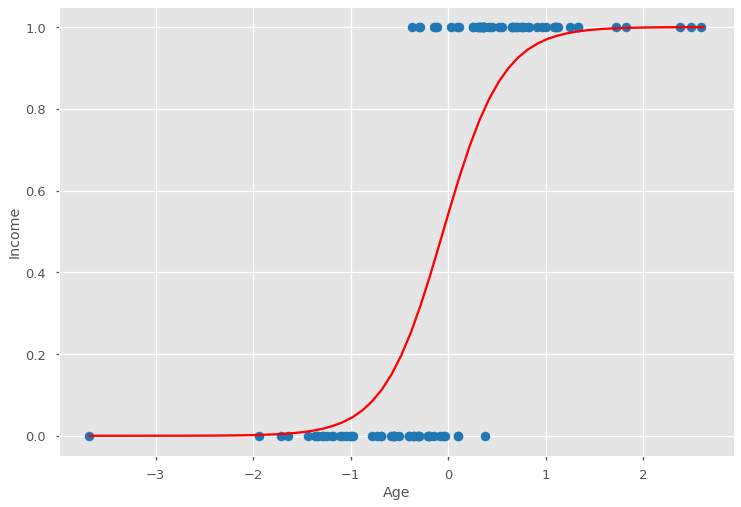

In [14]:
# Slice out the probabilities.
logreg_proba = [x[0][1] for x in logreg_preds]

# Show.
fig, ax = plt.subplots()
ax.scatter(x=X, y=y_binary, color=BLUE)
ax.plot(x_vals, 
        logreg_proba, 
        color='red')
ax.set(xlabel='Age', ylabel='Income')
fig.tight_layout()

<a id='logistic_regression'></a>
# The Logistic Regression Model

***Linear Regression Formula:*** *Another Recap*

$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \beta_n x_n $

*Or simplified to represent a single dimension:*

$ \text{income} = \beta_0 + \beta_1 \text{age} $

---

When you want to apply this to a binary dataset, what you actually want to do is perform a **classification** of your data in one group versus another one. A model will have to guess what the **probability** is of belonging to one group versus another. And that is exactly what logistic regression models can do! 

What happens is: 
- The linear regression is *transformed* in a way that the outcome takes a value between 0 and 1. 
- This can then be interpreted as a probability (e.g., 0.2 is a probability of 20%). A

***Applied to our example, the expression for a logistic regression model would look like this:***

$\LARGE P(\text{income} > 70) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{age})}} $

- Note that the outcome is written as $P(\text{income} > 70)$. 
    - This means that the output should be interpreted as *the probability that the income is greater than 70*.

In [15]:
logreg.predict_proba(X)

array([[2.03073513e-01, 7.96926487e-01],
       [6.67606575e-02, 9.33239343e-01],
       [9.85603374e-01, 1.43966262e-02],
       [6.92000922e-01, 3.07999078e-01],
       [2.05270347e-01, 7.94729653e-01],
       [9.97979823e-01, 2.02017746e-03],
       [4.85563905e-01, 5.14436095e-01],
       [2.17694980e-02, 9.78230502e-01],
       [9.82103402e-01, 1.78965975e-02],
       [8.56478079e-02, 9.14352192e-01],
       [8.51776056e-01, 1.48223944e-01],
       [8.87964914e-02, 9.11203509e-01],
       [2.29417455e-02, 9.77058255e-01],
       [2.11616287e-01, 7.88383713e-01],
       [3.48060985e-04, 9.99651939e-01],
       [2.38552983e-02, 9.76144702e-01],
       [8.40713159e-01, 1.59286841e-01],
       [2.23669178e-01, 7.76330822e-01],
       [3.76136632e-01, 6.23863368e-01],
       [6.94596689e-01, 3.05403311e-01],
       [3.04858206e-03, 9.96951418e-01],
       [3.79190006e-01, 6.20809994e-01],
       [2.21925435e-01, 7.78074565e-01],
       [9.62768398e-01, 3.72316019e-02],
       [9.165180

In [16]:
logreg.predict(X)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

# Evaluating Model Performance

<a id='cm'></a>
## Confusion Matrix



In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [18]:
# First, we get our "actual" predictions.
y_pred = logreg.predict(X)

# Next, create a confusion matrix.
conf_mx = confusion_matrix(y_binary, y_pred)
conf_mx

array([[43,  5],
       [ 6, 46]])

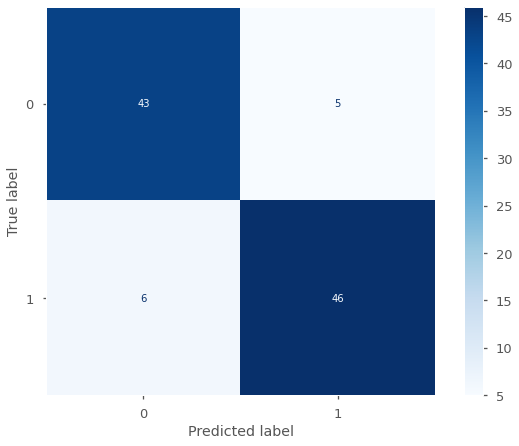

In [19]:
# Plot it!
plot_confusion_matrix(
    logreg,
    X,
    y_binary,
    cmap='Blues'
    )
plt.grid(False)

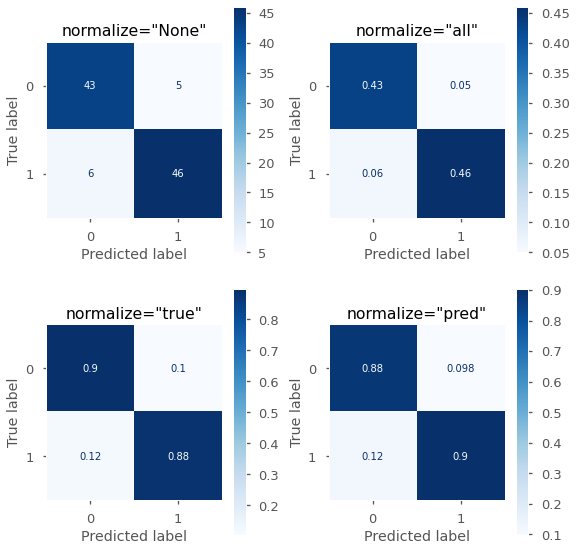

In [20]:
# Show `normalization`!
fig, ax_lst = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
norm_lst = [None, 'all', 'true', 'pred']

for ax, normalize_val in zip(ax_lst.flatten(), norm_lst):
    plot_confusion_matrix(
        logreg,
        X,
        y_binary,
        cmap='Blues',
        normalize=normalize_val,
        ax=ax)
    ax.grid(False)
    ax.set(title=f'normalize="{str(normalize_val)}"')

fig.tight_layout()

<a></a>
## False Positives / False Negatives

***True Positives (TP)***: 
- The number of observations where the model predicted `1`, and the true value was `1`.

***True Negatives (TN)***: 
- The number of observations where the model predicted `0`, and the true value was `0`.

***False Positives (FP)*** *(type-I error)*: 
- The number of observations where the model predicted `1`, **but** the true value was `0`!

***False Negatives (FN)*** *(type-II error)*: 
- The number of observations where the model predicted `0`, **but** the true value was `1`!

So far, we've kept it simple by only focusing on confusion matrices for binary classification problems. However, it's common to see classification tasks that are **_multi-categorical_** in nature. We can keep track of these by just expanding the number of rows and columns in our confusion matrix!

***Example of Multiclass Confusion Matrix***

<img src='./images/conf_mx.png' width=60%>

---

<a id='metrics'></a>
## Evaluation Metrics


>***Quick aside: `Score` vs `Error`/`Loss`***
>- Scores are metrics that are **better as they increases.**
>   - Ex: `Accuracy`, `Recall`
>
>
>- A `Loss` or `Cost` or `Error` are metrics that are **better as they decrease.**
>  - Ex: `MSE`, `Log-Loss (Cross Entropy Loss)`

---


### Accuracy Score
Out of **all** the predictions the model made, what percentage were correct?

$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

- The most intuitive metric.
    - Can be deceptive.

```python
>>> y_true = np.array([0, 0, 1, 1])
>>> y_pred = np.array([1, 1, 0, 1])
>>> 
>>> # 1/4 (0.25) correctly labeled predictions.
>>> accuracy_score(y_true, y_pred)
0.25
```

An `accuracy_score` of `1.0` means every prediction of the model was correct.

---

### Recall Score
Out of **all the positive class entries**, what percentage were correctly identified?

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 

- Good when identifying the positive class is important.
    
```python
>>> y_true = np.array([0, 0, 1, 1])
>>> y_pred = np.array([1, 1, 0, 1])
>>> 
>>> # 1/2 (0.5) true positives correctly labeled.
>>> recall_score(y_true, y_pred)
0.5
```

A `recall_score` of 1.0 means every positive class in `y_true` was predicted correctly.

---

### Precision Score
Out of **all the positive predictions**, what percentage were correct?

$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$

- Good when trusting when the model's "positive" predictions is important.

```python
>>> y_true = np.array([0, 0, 1, 1])
>>> y_pred = np.array([1, 1, 0, 1])
>>> 
>>> # 1/3 (0.33) predicted positives are correctly labeled.
>>> precision_score(y_true, y_pred)
0.3333333333333333
```

A `precision_score` of 1.0 means every time the model predicts `1`, it's correct.

---

### F1-Score Score
The "harmonic mean" of Recall and Precision.

> *The F-measure (and measures) can be interpreted as a weighted harmonic mean of the precision and recall.*

$$ \text{F1 score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall} $$

- Least intuitive, but demonstrates a balance between `precision_score` and `recall_score`.

```python
>>> y_true = np.array([0, 0, 1, 1])
>>> y_pred = np.array([1, 1, 0, 1])
>>> 
>>> # 2 * ((0.333 * 0.5) / (0.333 + 0.5)) = 0.3999759990399616
>>> f1_score(y_true, y_pred)
0.4
```

An `f1_score` of 1.0 means that both `precision_score` and `recall_score` are 1.0 (therefore, `accuracy_score` would also be 1.0).

### Classification Report

Easily print out important classifier metrics.

In [21]:
from sklearn.metrics import classification_report

In [22]:
# print(classification_report(y_binary, logreg.predict(X)))
print(classification_report(y_binary, logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.90      0.88      0.89        52

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



### ROC and AUC

***ROC***: Receiver Operating Characteristic 

***AUC***: Area Under the Curve

<img src='./images/ROC.png' width=40%>

- The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate. 
- The AUC, or area under the curve, gives us a singular metric to compare these. 
    - An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.
    
<img src='./images/decision_boundary.png' width=40%>

In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
# Calculate the probability scores of each of the datapoints
y_score = logreg.decision_function(X)
y_score

array([ 1.36719439e+00,  2.63754775e+00, -4.22626013e+00, -8.09490500e-01,
        1.35367412e+00, -6.20254770e+00,  5.77604348e-02,  3.80523552e+00,
       -4.00508599e+00,  2.36797220e+00, -1.74859938e+00,  2.32841912e+00,
        3.75158808e+00,  1.31521025e+00,  7.96278473e+00,  3.71160449e+00,
       -1.66354392e+00,  1.24441067e+00,  5.05978921e-01, -8.21698140e-01,
        5.79002546e+00,  4.92987653e-01,  1.25448091e+00, -3.25265497e+00,
       -2.39595125e+00,  1.86670969e+00,  3.33574510e+00,  3.16651338e+00,
       -3.40052932e+00, -1.14960296e-01, -8.19593733e-01, -4.74753347e-01,
       -4.29268926e+00,  2.31442042e+00,  1.00430612e+00, -1.05679584e+00,
       -8.70324565e-01,  4.50130011e-01, -1.67109349e+00,  2.51694812e+00,
       -1.49091327e+00,  1.13041406e+00, -2.09624179e+00,  8.38652621e-03,
        1.21957600e+00, -3.09836727e+00,  2.46074703e+00, -1.00140757e+00,
       -2.47549879e-01, -5.02748642e-01,  1.40287064e+00, -3.06923822e-01,
        4.26322909e+00,  

In [25]:
# Using `roc_curve` to find the false positive rate, true positive rate, and thresholds.
fpr, tpr, thresholds = roc_curve(y_binary, y_score)

# Calculate auc.
auc(fpr, tpr)

0.96875

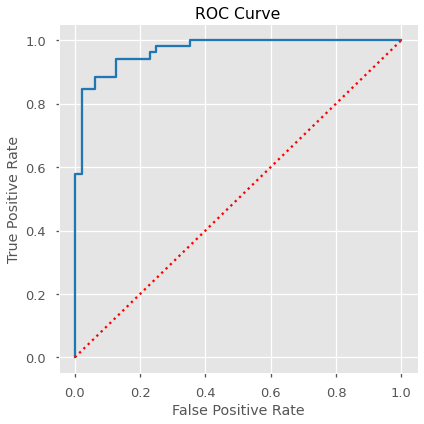

In [26]:
# Plotting our curve.
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, color=BLUE, label='ROC Curve')
ax.plot([0,1], [0,1], color='red', ls=':') # Creating a diagonal line.
ax.set(
    title='ROC Curve',
    xlabel='False Positive Rate',
    ylabel='True Positive Rate'
    )
fig.tight_layout()

In [27]:
# Create a function for later.
def show_metrics(estimator, X_data, y_data, title=''):
    """Docstring"""
    y_pred = estimator.predict(X_data)
    
    if title:
        print(f'**********{title.title()}**********')
    
    # Show classification report.
    print(classification_report(y_data, y_pred))
    
    y_score = estimator.decision_function(X_data)
    fpr, tpr, thresholds = roc_curve(y_data, y_score)
    
    # Show ROC & Confusion Matrix
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
    ax1.plot(fpr, tpr, color=BLUE, label='ROC Curve')
    ax1.plot([0,1], [0,1], color='red', ls=':') # Creating a diagonal line.
    ax1.set(
        title='ROC Curve',
        xlabel='False Positive Rate',
        ylabel='True Positive Rate'
        )
    
    plot_confusion_matrix(estimator, X_data, y_data, cmap='Blues', ax=ax2)
    ax2.grid(False)
    ax2.set(title='Confusion Matrix')
    
    plt.show()
    return

<a id='class_imb'></a>
# Class Imbalance

Consider an example where there are 1000 entries, and only 2 of them belonged to the "positive" class.

In such a case, even a naive classifier that always predicted "negative" would have a very high `accuracy` of `0.998`.

Such scenarios are relatively common in areas such as **medical conditions** or **credit card fraud**. This is known as the 'class imbalance' problem. As such, there has been a lot of work and research regarding class imbalance problems and methods for tuning classification algorithms to better fit these scenarios.

**There are two common approaches to Class Imbalance:**
- Class Weights
- SMOTE (Synthetic Minority Oversampling)

---

First, let's create an imbalanced dataset.

In [28]:
from sklearn.datasets import make_classification

In [29]:
X, y = make_classification(
    n_samples=1000,
    weights=[0.9, 0.1], # 90% belonging to one class, 10% belonging to the other.
    random_state=2021
    )

X = pd.DataFrame(X, columns=[f'f{n}' for n in range(1, len(X[0]) + 1)])
y = pd.DataFrame(y, columns=['target'])

df = pd.concat([y, X], axis=1)
df

,target,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,0,1.012632,0.222001,0.370596,0.494701,0.069927,0.060732,0.964117,-1.168078,1.088572,...,1.305537,-0.938739,0.570122,0.500080,-1.752420,0.647695,-1.793541,1.196267,-1.400249,0.074673
1,0,-0.469458,-0.091042,-0.665339,1.276425,0.683220,0.350391,1.287026,0.440841,1.757788,...,1.070049,-0.046512,-1.328332,-0.171624,-1.737773,-0.197439,0.008713,-1.834733,-0.546693,-0.649026
2,0,-0.668279,0.258671,-0.097308,-1.638188,-0.429870,-0.724229,0.364691,1.462167,0.550991,...,-0.433998,-0.743752,-1.568594,0.945675,-0.229651,-0.312458,0.707297,1.919339,0.398118,-1.140090
3,0,-0.608146,1.548068,-1.120900,-1.661019,0.604718,-1.043343,-0.017611,1.068491,1.538248,...,0.122953,0.997165,-1.459748,-0.211234,0.070879,-0.877819,-1.129878,-0.880994,0.817883,0.841808
4,0,-0.004008,-0.758565,-0.471775,0.644612,-1.053770,2.560240,0.091671,-0.950888,0.590719,...,1.080259,-0.489615,0.451670,0.850729,1.428027,-0.777049,-1.789742,1.402318,-0.129762,-1.078731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-0.205305,-1.174142,-0.118815,0.087132,-0.394606,1.178322,0.537403,-0.192117,0.459273,...,0.279620,0.047960,0.047545,0.997256,1.728935,1.049557,0.963866,-0.260803,0.519962,-1.545136
996,0,0.314237,0.407131,1.241480,0.060128,-0.706027,0.550875,-0.290031,0.639859,0.477988,...,0.565253,-0.499674,-1.224346,0.102921,1.430398,1.213943,-0.852700,-0.286698,0.770248,-0.092278
997,0,0.765369,0.335026,-0.745279,0.333947,-0.699241,0.432202,0.056722,-0.621768,-0.734151,...,0.524242,0.920235,0.425062,1.359040,-0.579590,-0.149926,1.208876,0.897337,0.727344,-0.245959
998,1,1.481574,-0.412388,0.237262,0.888252,0.742768,-0.605325,-0.058233,-0.045293,0.679437,...,0.390954,1.312317,-0.220312,-0.897804,-1.010902,-0.128700,-0.598222,-0.103158,-0.075899,-0.499069


In [30]:
# Confirming that the positive class has many fewer entries.
df['target'].value_counts(normalize=True)

0    0.894
1    0.106
Name: target, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    stratify=df['target'],
    random_state=2021
    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 20), (250, 20), (750,), (250,))

In [33]:
y_train.value_counts(normalize=True)

0    0.893333
1    0.106667
Name: target, dtype: float64

In [34]:
y_test.value_counts(normalize=True)

0    0.896
1    0.104
Name: target, dtype: float64

## Class Weights

Class weights are built-in as parameters to the models we work with.

We can check the `docstring` of the Logistic Regression model in sklearn.

---

```python
Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
```

---

```
class_weight : dict or 'balanced', default=None
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one.

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.
```
    
---

Class weights can be created manually or generated automatically to be based on the value_count of each class.

For each class label, a "reward" is given for correctly predicting it correctly.

> For example, if you assigned the class weights to be `{0: 1, 1: 5}`, the model will consider finding class `1` 5x more valuable.

In [35]:
from sklearn.utils.class_weight import compute_class_weight

In [36]:
# Compute class weights.
compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['target']), 
    y=y_train)

array([0.55970149, 4.6875    ])

In [37]:
# Create a dictionary to pass into model.
class_weight_dct = dict(
    zip(
        np.unique(y_train), 
        compute_class_weight(class_weight='balanced',
                             classes=np.unique(df['target']), 
                             y=df['target'])
       )
)
class_weight_dct

{0: 0.5592841163310962, 1: 4.716981132075472}

In [38]:
# Training two models. One with class weights, one without.
logreg_plain = LogisticRegression()
logreg_weights = LogisticRegression(class_weight='balanced') # class_weight='balanced'

models = [logreg_plain, logreg_weights]

# Train models.
for model in models:
    model.fit(X_train, y_train)

**********No Class Weights**********
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       224
           1       1.00      0.65      0.79        26

    accuracy                           0.96       250
   macro avg       0.98      0.83      0.89       250
weighted avg       0.97      0.96      0.96       250



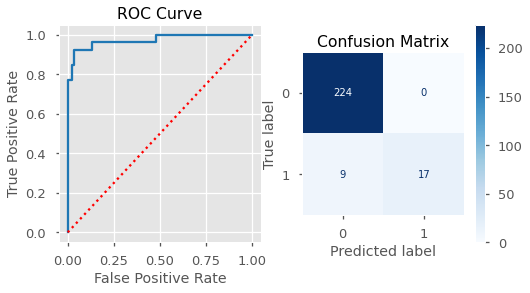

**********With Class Weights**********
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       224
           1       0.48      0.85      0.61        26

    accuracy                           0.89       250
   macro avg       0.73      0.87      0.77       250
weighted avg       0.93      0.89      0.90       250



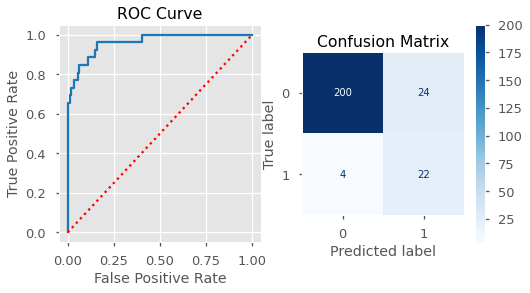

In [39]:
# Check the models on unseen data.
show_metrics(logreg_plain, X_test, y_test, 'No Class Weights')
show_metrics(logreg_weights, X_test, y_test, 'With Class Weights')

**********No Class Weights**********
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       670
           1       0.98      0.78      0.87        80

    accuracy                           0.97       750
   macro avg       0.98      0.89      0.93       750
weighted avg       0.97      0.97      0.97       750



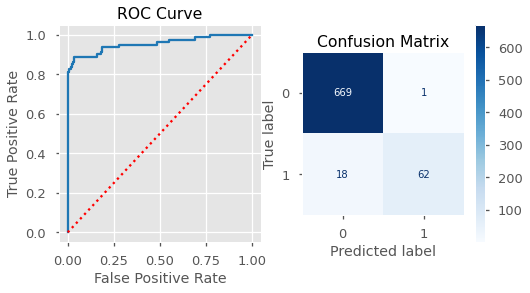

**********With Class Weights**********
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       670
           1       0.57      0.90      0.70        80

    accuracy                           0.92       750
   macro avg       0.78      0.91      0.83       750
weighted avg       0.94      0.92      0.93       750



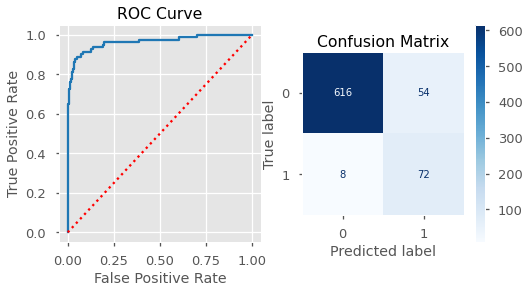

In [40]:
# Check the fitting on the training data.
show_metrics(logreg_plain, X_train, y_train, 'No Class Weights')
show_metrics(logreg_weights, X_train, y_train, 'With Class Weights')

## SMOTE

*Synthetic Minority Over-sampling Technique*

This class generates *synthetic data points* in order to balance the dataset.

<img src='./images/SMOTE.png'>

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=2021)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train)

In [43]:
y_train.value_counts()

0    670
1     80
Name: target, dtype: int64

In [44]:
y_train_smote.value_counts()

1    670
0    670
Name: target, dtype: int64